In [1]:
import sys
import os
import numpy as np
import pandas as pd         
import xarray as xr         
import matplotlib.pyplot as plt  
import stackstac
from pystac_client import Client as StacClient
from dask.distributed import Client, LocalCluster

In [2]:
cluster = LocalCluster(
    n_workers=4,             
    threads_per_worker=1,    
    memory_limit="6GB"       
)
client = Client(cluster)
cluster    


LocalCluster(59a571df, 'tcp://127.0.0.1:34701', workers=4, threads=4, memory=22.35 GiB)

In [3]:
sys.path.append(os.path.abspath("../utils"))

# Import plotting functions from spatial utilities
from spatial_utils import plot_wqi_mean_maps, plot_wqi_std_maps
from stack_loader import load_wqi_stack

In [4]:
TAMPA_BAY = (-82.7167, 27.5833, -82.3833, 28.0333)

start_date = "2019-12-01"
end_date = "2024-12-31"

In [5]:
# Loading pixel-level Sentinel-2 stack
stack = load_wqi_stack(
    bbox=TAMPA_BAY,
    start_date=start_date,
    end_date=end_date,
    epsg=32617,
    max_items=100,
    filter_clouds=True
)

Stack loaded with shape: (26, 5, 4912, 3271)


/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


In [5]:
# Load pixel-level Sentinel-2 stack
print("Loading pixel-level Sentinel-2 stack...")
stack = load_wqi_stack(
    bbox=TAMPA_BAY,
    start_date=start_date,
    end_date=end_date,
    epsg=32617,
    max_items=100,
    filter_clouds=True
)

Loading pixel-level Sentinel-2 stack...
Stack loaded with shape: (26, 5, 4912, 3271)


/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


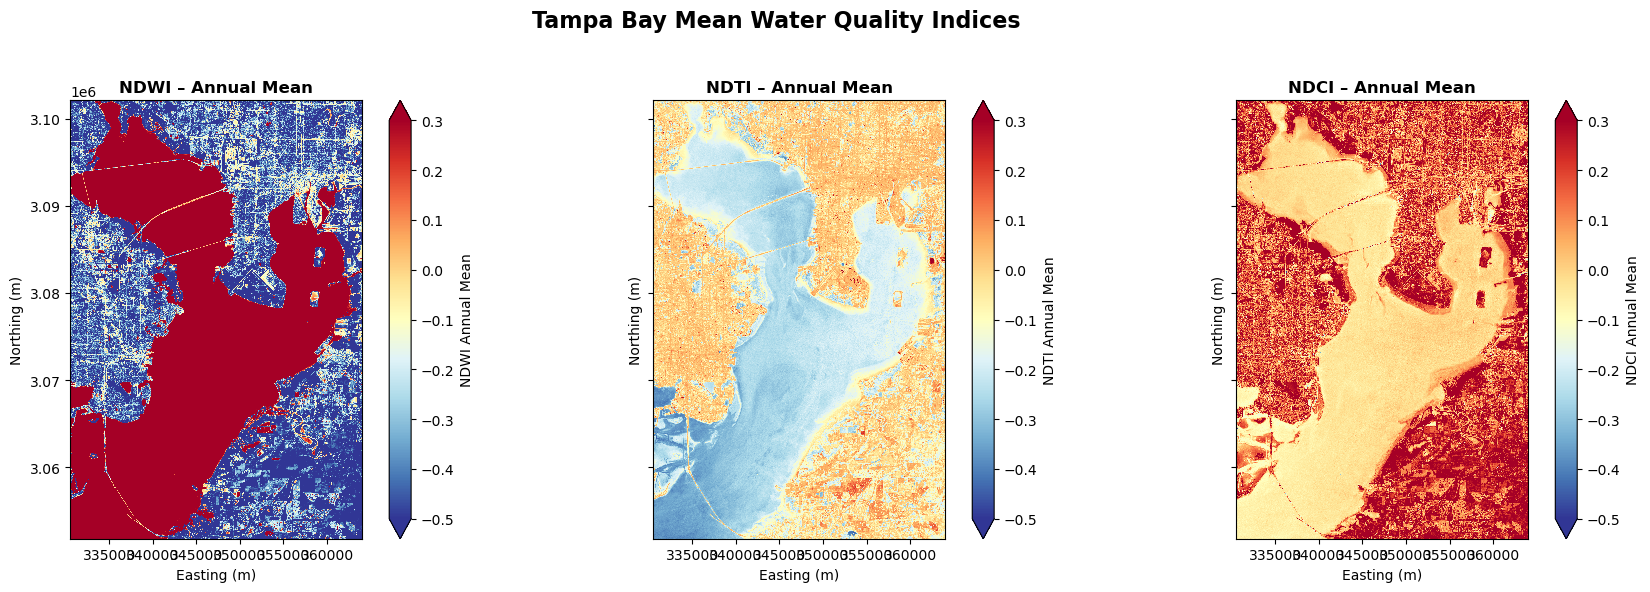

2025-12-17 10:22:32,926 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 4.71 GiB -- Worker memory limit: 5.59 GiB
2025-12-17 10:22:33,348 - distributed.worker.memory - WARNING - Worker is at 68% memory usage. Resuming worker. Process memory: 3.83 GiB -- Worker memory limit: 5.59 GiB
2025-12-17 10:24:05,906 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 4.61 GiB -- Worker memory limit: 5.59 GiB
2025-12-17 10:24:06,153 - distributed.worker.memory - WARNING - Worker is at 32% memory usage. Resuming worker. Process memory: 1.79 GiB -- Worker memory limit: 5.59 GiB
2025-12-17 10:25:33,252 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 4.54 GiB -- Worker memory limit: 5.59 GiB
2025-12-17 10:25:33,523 - distributed.worker.memory - WARNING - Worker is at 66% memory usage. Resuming worker. Process memory: 3.71 GiB -- Worker mem

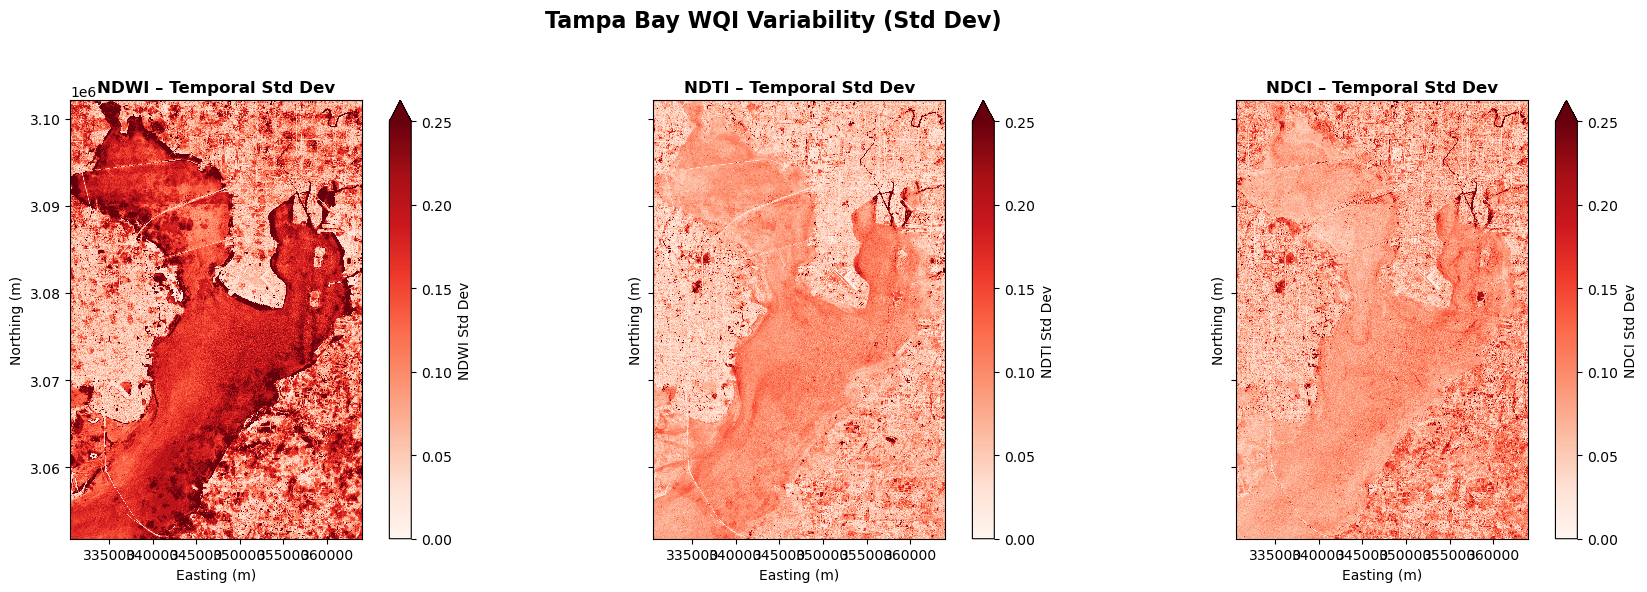

In [7]:
# Annual mean maps (NDWI, NDTI, NDCI)
plot_wqi_mean_maps(
    stack,
    title="Tampa Bay Mean Water Quality Indices"
)

# Standard deviation maps (variability)
plot_wqi_std_maps(
    stack,
    title="Tampa Bay WQI Variability (Std Dev)"
)

2025-12-16 04:35:13,151 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 4.49 GiB -- Worker memory limit: 5.59 GiB
2025-12-16 04:35:13,273 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 4.39 GiB -- Worker memory limit: 5.59 GiB
2025-12-16 04:35:14,093 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 4.61 GiB -- Worker memory limit: 5.59 GiB
2025-12-16 04:35:14,483 - distributed.worker.memory - WARNING - Worker is at 36% memory usage. Resuming worker. Process memory: 2.02 GiB -- Worker memory limit: 5.59 GiB
2025-12-16 04:35:16,231 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 4.48 GiB -- Worker memory limit: 5.59 GiB
2025-12-16 04:35:16,590 - distributed.worker.memory - WARNING - Worker is at 31% memory usage. Resuming worker. Process memory: 1.79 GiB -- Worker mem

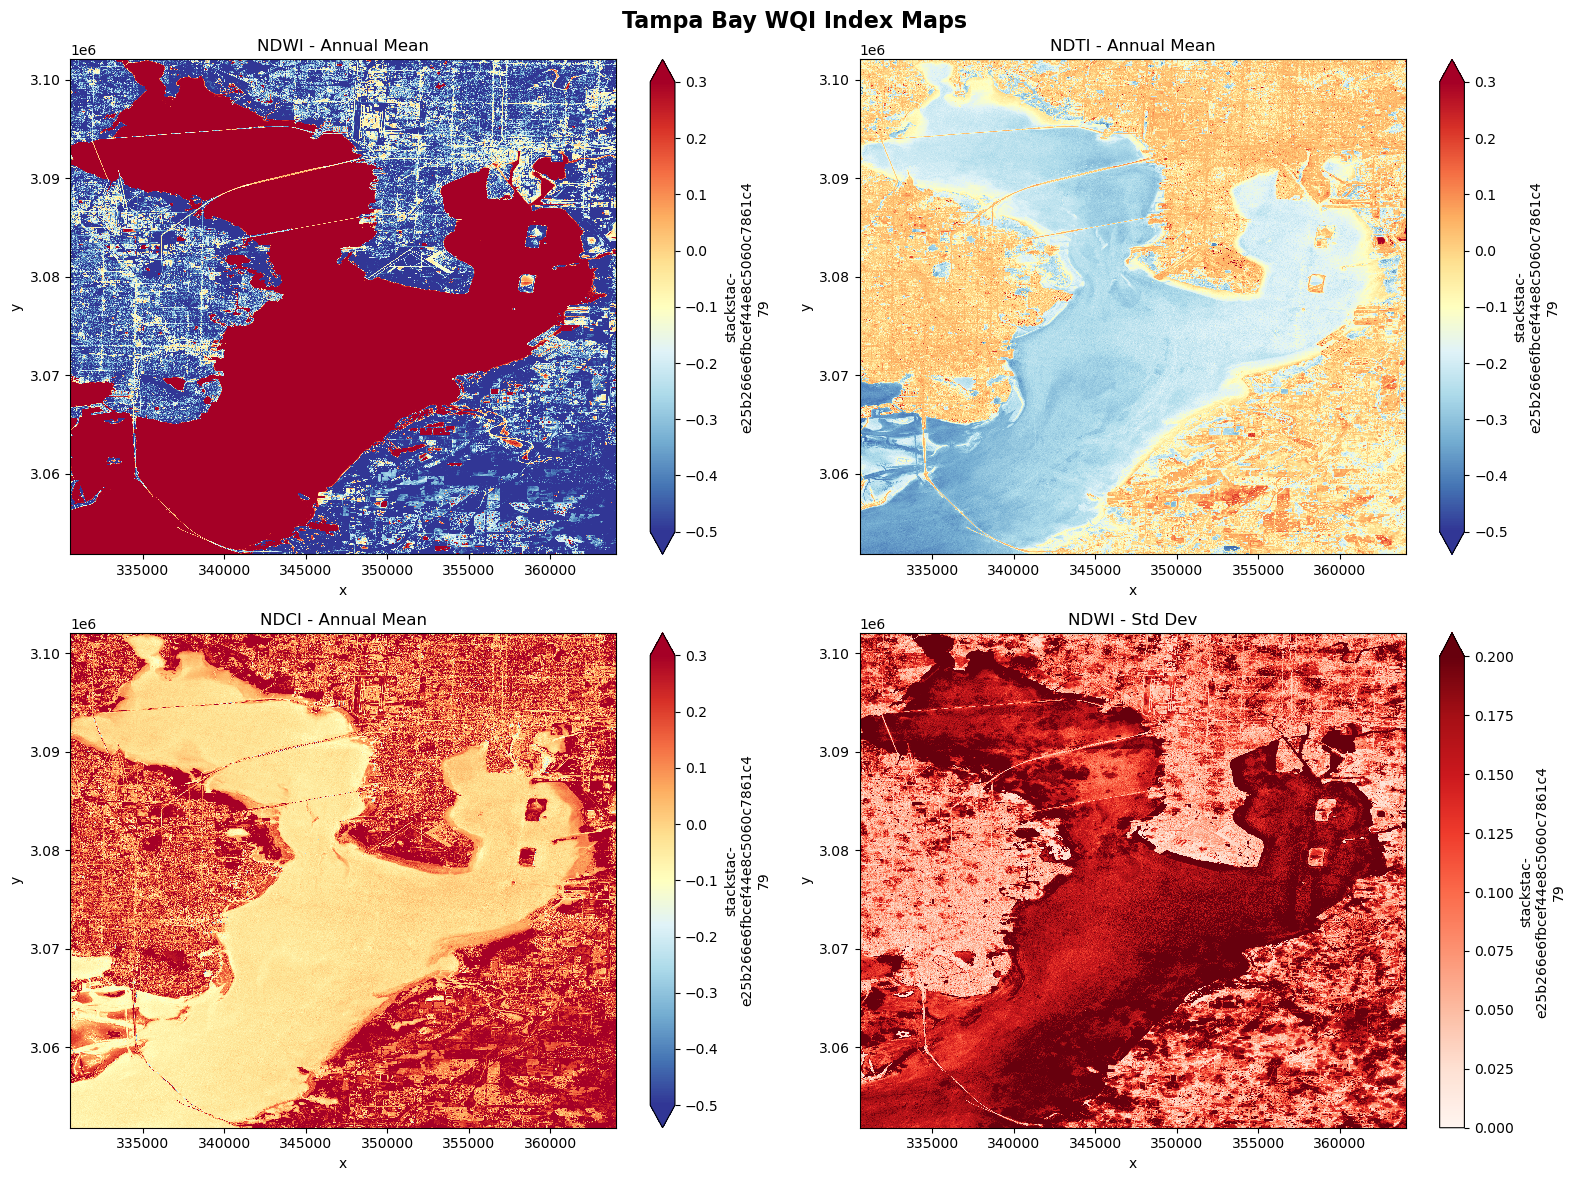

In [7]:
# Annual mean maps + NDWI std map
plot_wqi_index_maps(
    stack,
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay WQI Index Maps"
)

2025-12-13 18:19:50,607 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 4.66 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 18:19:50,824 - distributed.worker.memory - WARNING - Worker is at 32% memory usage. Resuming worker. Process memory: 1.79 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 18:19:54,868 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 4.18 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 18:21:31,691 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 4.56 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 18:21:31,892 - distributed.worker.memory - WARNING - Worker is at 65% memory usage. Resuming worker. Process memory: 3.68 GiB 

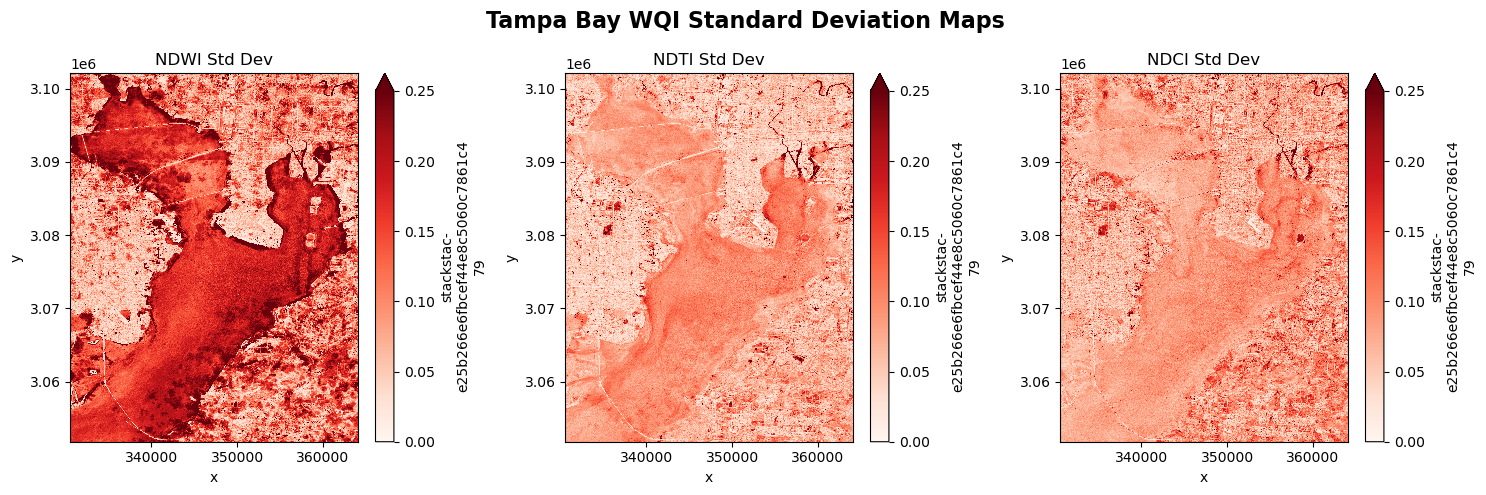

In [7]:
# Standard deviation maps
plot_wqi_std_maps(
    stack,
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay WQI Standard Deviation Maps"
)


## Composite Risk Map OF Tampa Bay

In [13]:
# Define normalized difference function
def normalized_diff(a, b):
    return (a - b) / (a + b)

# Select bands from your stack
green    = stack.sel(band='green')
red      = stack.sel(band='red')
nir      = stack.sel(band='nir')
rededge1 = stack.sel(band='rededge1')

# Compute water quality indices
ndwi = normalized_diff(green, nir)       
ndti = normalized_diff(red, green)       
ndci = normalized_diff(rededge1, red)


In [14]:
# Aggregating mean over time
ndwi_mean = ndwi.mean(dim='time')
ndti_mean = ndti.mean(dim='time')
ndci_mean = ndci.mean(dim='time')

# Normalizing indices feom (0 to 1)
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

ndwi_n = normalize(ndwi_mean)
ndti_n = normalize(ndti_mean)
ndci_n = normalize(ndci_mean)

In [17]:
# Computing composite risk index
risk = ((1 - ndwi_n) + ndti_n + ndci_n) / 3

risk_class = xr.apply_ufunc(
    lambda x: np.digitize(x, bins=[0.33, 0.66]),
    risk,
    dask='parallelized',      # enable Dask support
    output_dtypes=[int]       # dtype of the output
)


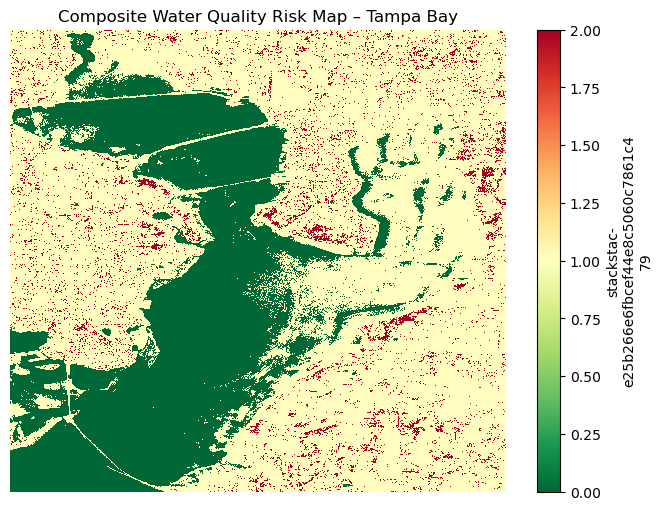

In [18]:
 # Plotting the composite risk map
plt.figure(figsize=(8,6))
risk_class.plot(cmap='RdYlGn_r')
plt.title("Composite Water Quality Risk Map – Tampa Bay")
plt.axis('off')
plt.show()

In [13]:
# --------------------------------------------------
# 3. Composite Risk Map
# --------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr

def normalize_index(idx):
    """Normalize an xarray DataArray to 0–1."""
    return (idx - idx.min()) / (idx.max() - idx.min())

def plot_composite_risk_map(stack, title="Tampa Bay Water Quality Risk Map"):
    """
    Generate a composite water quality risk map combining NDWI, NDTI, NDCI.

    Parameters
    ----------
    stack : xarray.DataArray
        Stackstac output with bands: green, red, nir, rededge1
    title : str
        Figure title
    """

    # 1. Compute indices
    ndwi = (stack.sel(band="green") - stack.sel(band="nir")) / (stack.sel(band="green") + stack.sel(band="nir") + 1e-10)
    ndti = (stack.sel(band="red") - stack.sel(band="green")) / (stack.sel(band="red") + stack.sel(band="green") + 1e-10)
    ndci = (stack.sel(band="rededge1") - stack.sel(band="red")) / (stack.sel(band="rededge1") + stack.sel(band="red") + 1e-10)

    # 2. Annual means
    ndwi_mean = ndwi.mean("time")
    ndti_mean = ndti.mean("time")
    ndci_mean = ndci.mean("time")

    # 3. Normalize indices (flip NDWI: low NDWI = high risk)
    ndwi_norm = 1 - normalize_index(ndwi_mean)
    ndti_norm = normalize_index(ndti_mean)
    ndci_norm = normalize_index(ndci_mean)

    # 4. Composite risk (average)
    composite_risk = (ndwi_norm + ndti_norm + ndci_norm) / 3

    # 5. Classify into risk zones: 1=Low, 2=Medium, 3=High
    risk_zones = xr.where(composite_risk <= 0.33, 1,
                  xr.where(composite_risk <= 0.66, 2, 3))

    # 6. Plot
    fig, ax = plt.subplots(figsize=(8, 7))
    cmap = mcolors.ListedColormap(["green", "yellow", "red"])
    bounds = [1, 2, 3, 4]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    risk_zones.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=True)
    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Easting (m)")
    ax.set_ylabel("Northing (m)")
    ax.set_aspect("equal")
    plt.tight_layout()
    plt.savefig(f"{title.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")
    plt.show()


2025-12-17 11:44:13,965 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/distributed/worker.py", line 1250, in heartbeat
    response = await retry_operation(
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/distributed/utils_comm.py", line 461, in retry_operation
    return await retry(
           ^^^^^^^^^^^^
  File "/opt/conda/envs/geog313-final-project/lib/python3.11/site-

In [11]:
ndwi = normalized_diff(stack.sel(band="green"), stack.sel(band="nir"))
ndti = normalized_diff(stack.sel(band="red"), stack.sel(band="green"))
ndci = normalized_diff(stack.sel(band="rededge1"), stack.sel(band="red"))

# Compute annual mean
ndwi_mean = ndwi.mean("time")
ndti_mean = ndti.mean("time")
ndci_mean = ndci.mean("time")

# Normalize (flip NDWI since low NDWI = high risk)
ndwi_norm = 1 - normalize_index(ndwi_mean)
ndti_norm = normalize_index(ndti_mean)
ndci_norm = normalize_index(ndci_mean)

# Composite risk score (equal weights)
composite_risk = (ndwi_norm + ndti_norm + ndci_norm) / 3


NameError: name 'normalized_diff' is not defined

In [ ]:
risk_zones = xr.where(composite_risk <= 0.33, 1,   # Low risk
              xr.where(composite_risk <= 0.66, 2, 3))  # Medium=2, High=3


In [ ]:
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(8, 7))

cmap = mcolors.ListedColormap(["green", "yellow", "red"])
bounds = [1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

risk_zones.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=True)
ax.set_title("Tampa Bay Water Quality Risk Map", fontweight="bold")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_aspect("equal")
plt.tight_layout()
plt.show()